In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.duplicated().sum()

240

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [8]:
bins = (0, 6.5, 10)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [9]:
data["quality"] = [int(i) for i in data["quality"]]

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='fixed acidity'>

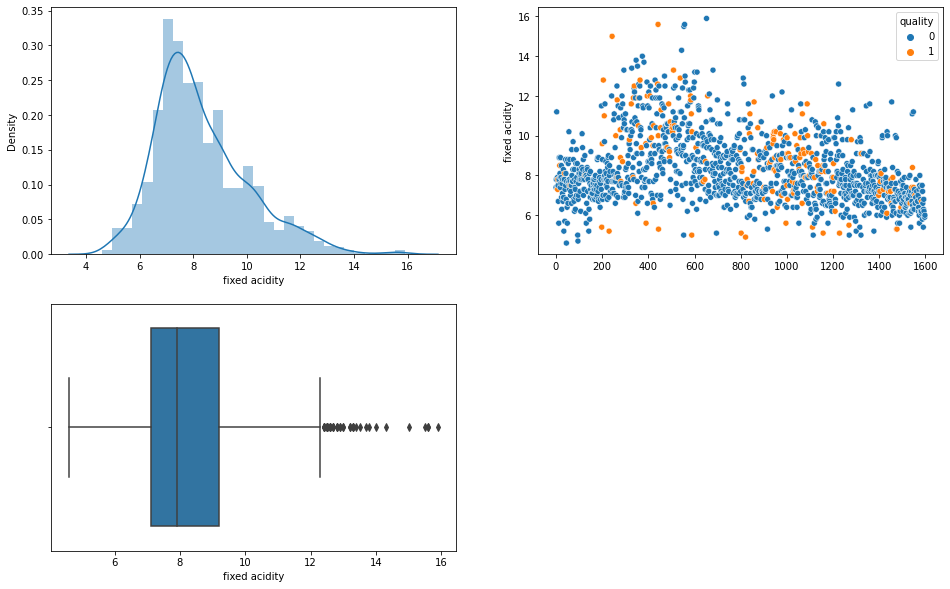

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["fixed acidity"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["fixed acidity"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['fixed acidity'])

In [15]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["fixed acidity"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["fixed acidity"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["fixed acidity"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='volatile acidity'>

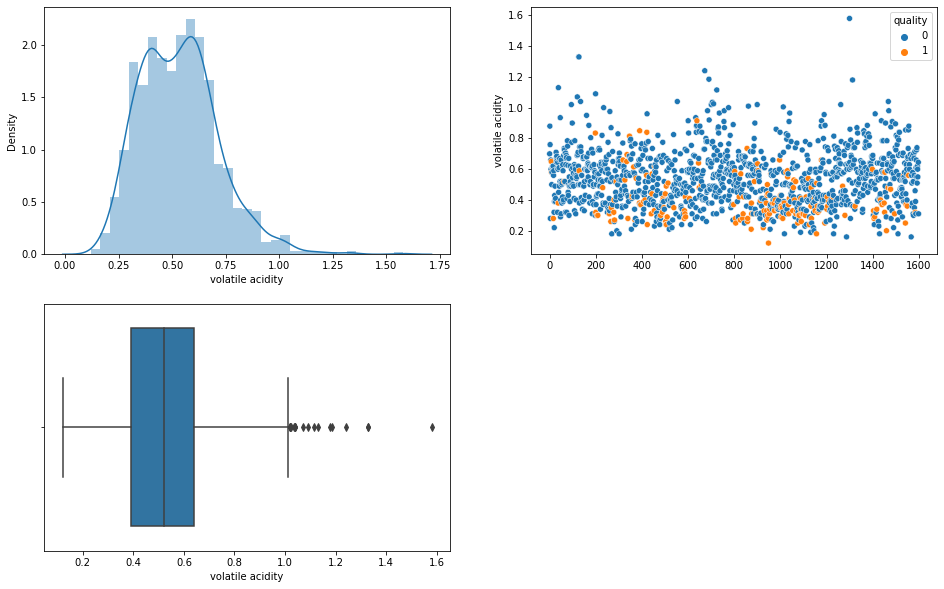

In [16]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["volatile acidity"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["volatile acidity"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['volatile acidity'])

In [17]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["volatile acidity"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["volatile acidity"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["volatile acidity"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='citric acid'>

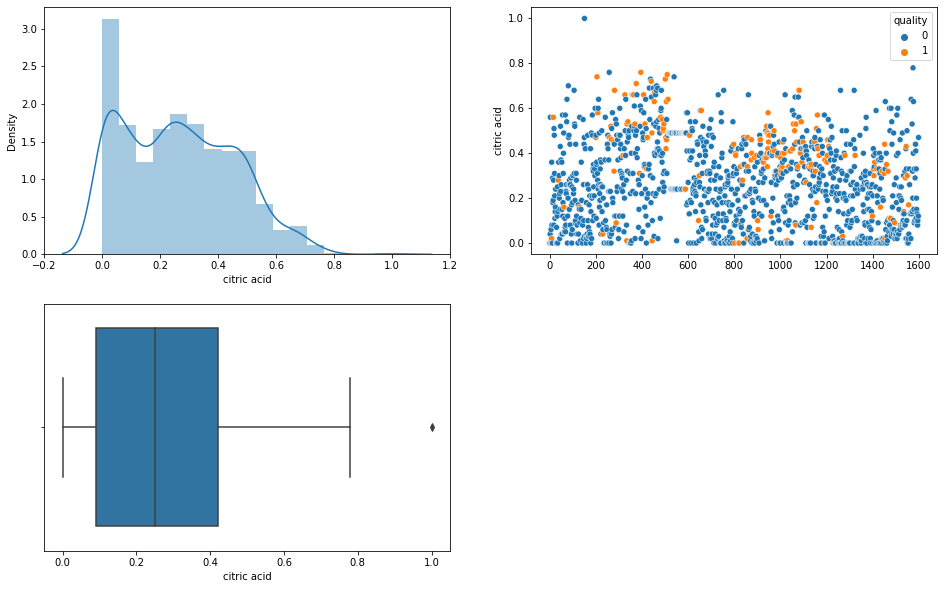

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["citric acid"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["citric acid"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['citric acid'])

In [19]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["citric acid"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["citric acid"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["citric acid"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='residual sugar'>

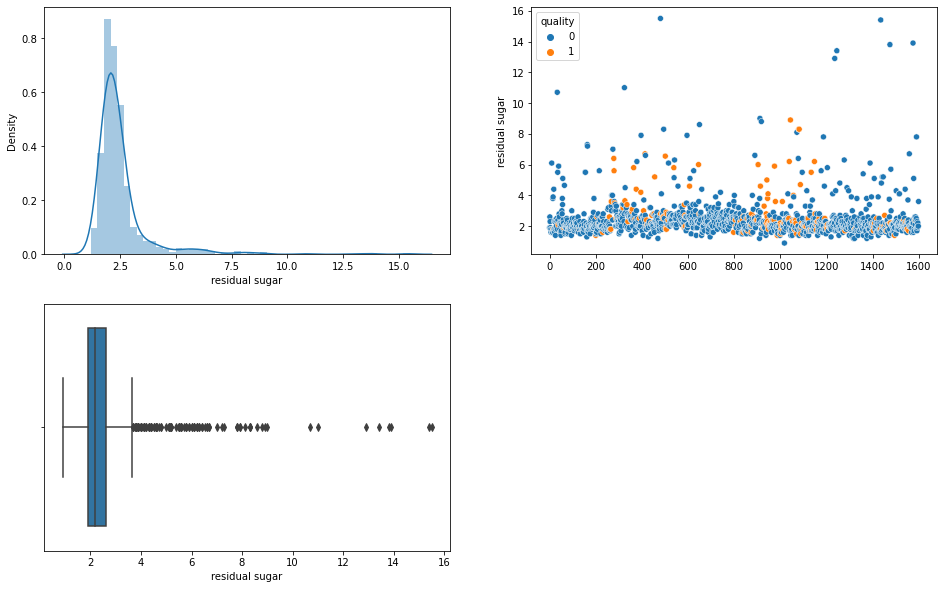

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["residual sugar"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["residual sugar"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['residual sugar'])

In [21]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["residual sugar"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["residual sugar"] > tsp) | (selected_spec["residual sugar"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='chlorides'>

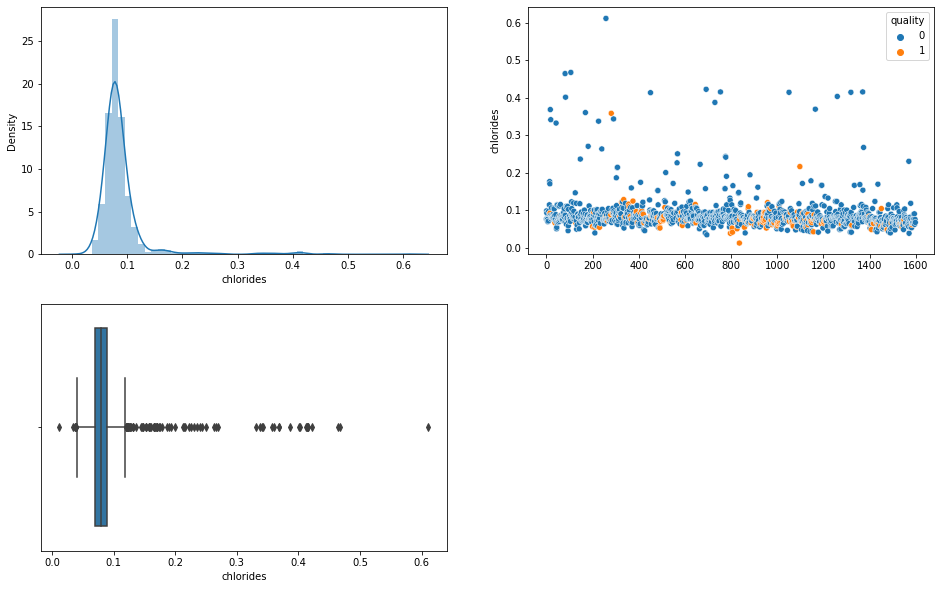

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["chlorides"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["chlorides"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['chlorides'])

In [23]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["chlorides"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["chlorides"] > tsp) | (selected_spec["chlorides"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='free sulfur dioxide'>

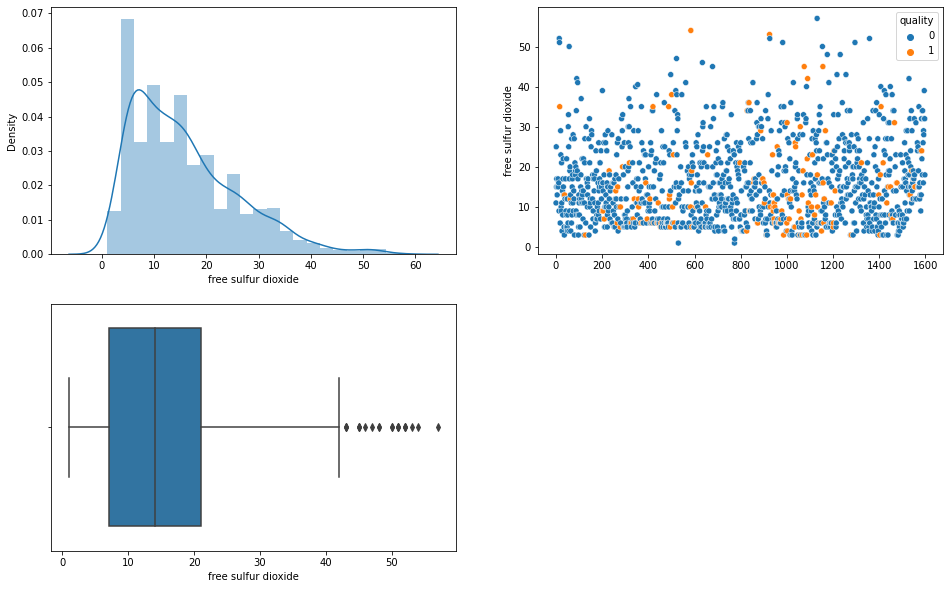

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["free sulfur dioxide"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["free sulfur dioxide"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['free sulfur dioxide'])

In [25]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["free sulfur dioxide"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["free sulfur dioxide"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["free sulfur dioxide"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='total sulfur dioxide'>

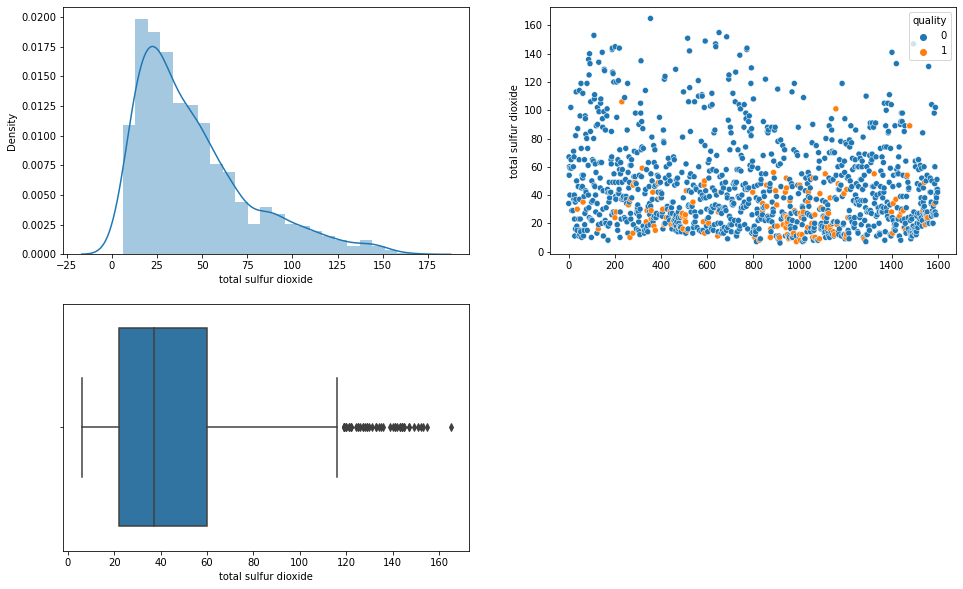

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["total sulfur dioxide"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["total sulfur dioxide"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['total sulfur dioxide'])

In [27]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["total sulfur dioxide"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["total sulfur dioxide"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["total sulfur dioxide"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='density'>

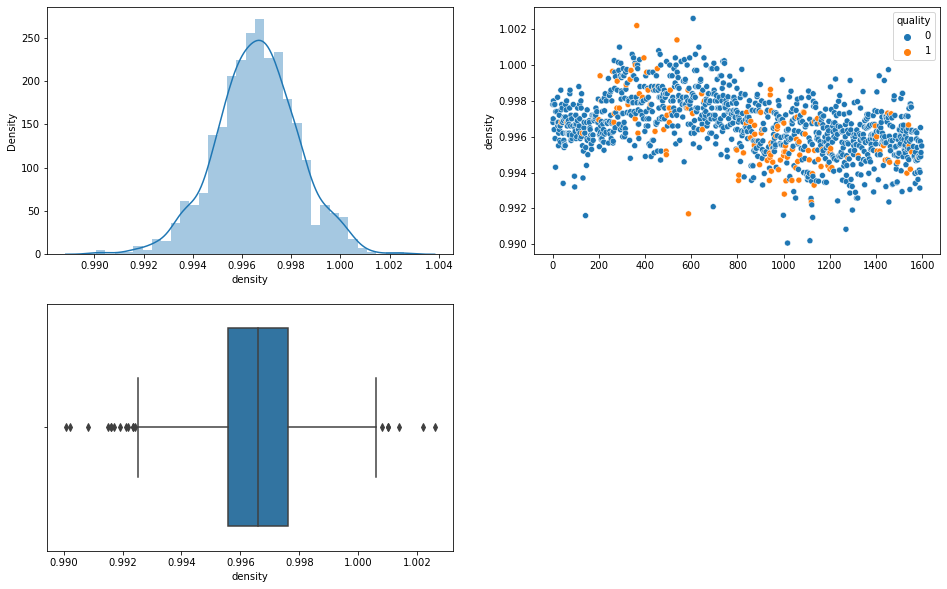

In [28]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["density"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["density"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['density'])

In [29]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["density"]

    std = selected_column.std()
    avg = selected_column.mean()

    tsp = avg + 3*std
    tsm = avg - 3*std

    outliers = selected_column[((selected_spec["density"] > tsp) | (selected_spec["density"] < tsm))].index

    data.drop(index=outliers, inplace=True)

<AxesSubplot:xlabel='pH'>

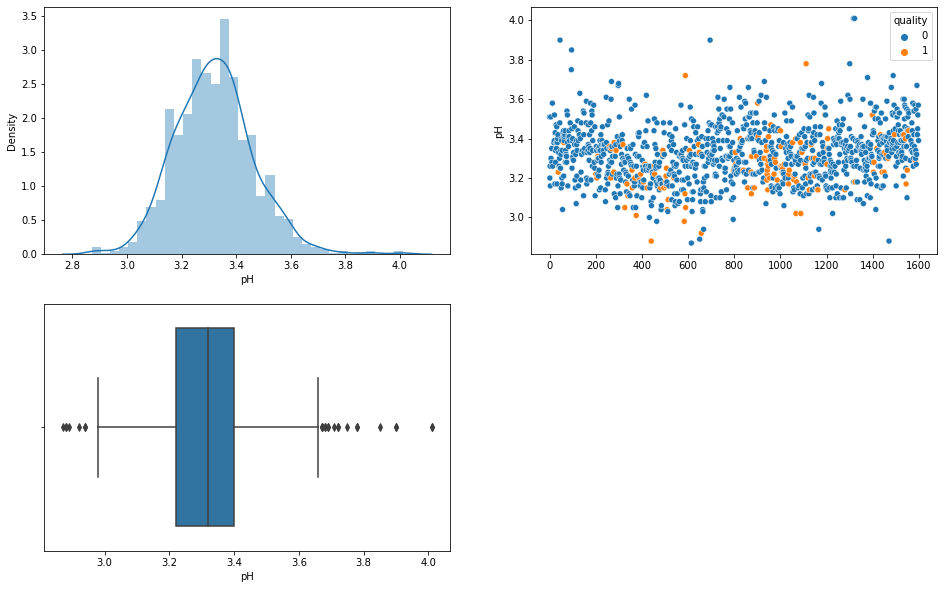

In [30]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["pH"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["pH"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['pH'])

In [31]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["pH"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["pH"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["pH"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='sulphates'>

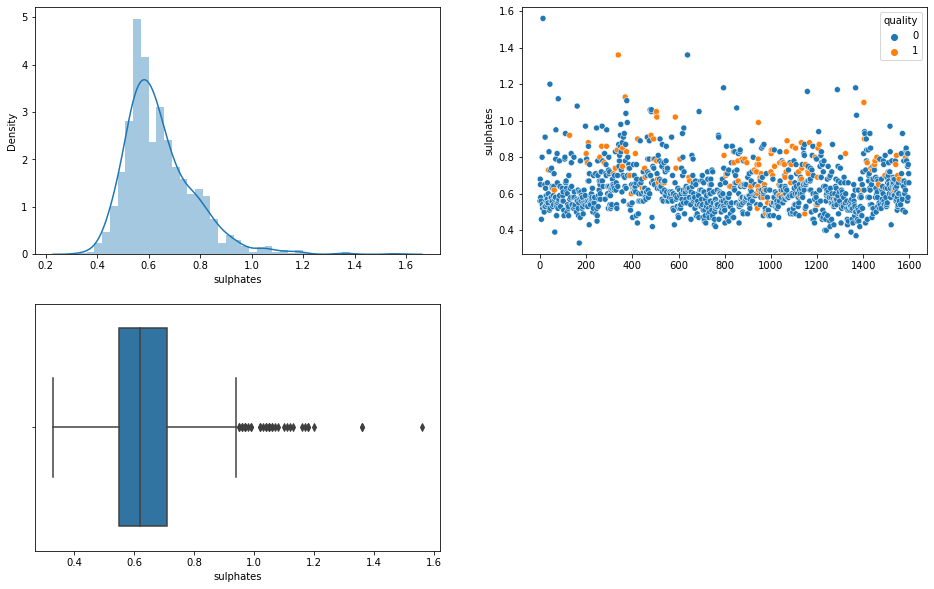

In [32]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["sulphates"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["sulphates"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['sulphates'])

In [33]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["sulphates"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["sulphates"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["sulphates"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

<AxesSubplot:xlabel='alcohol'>

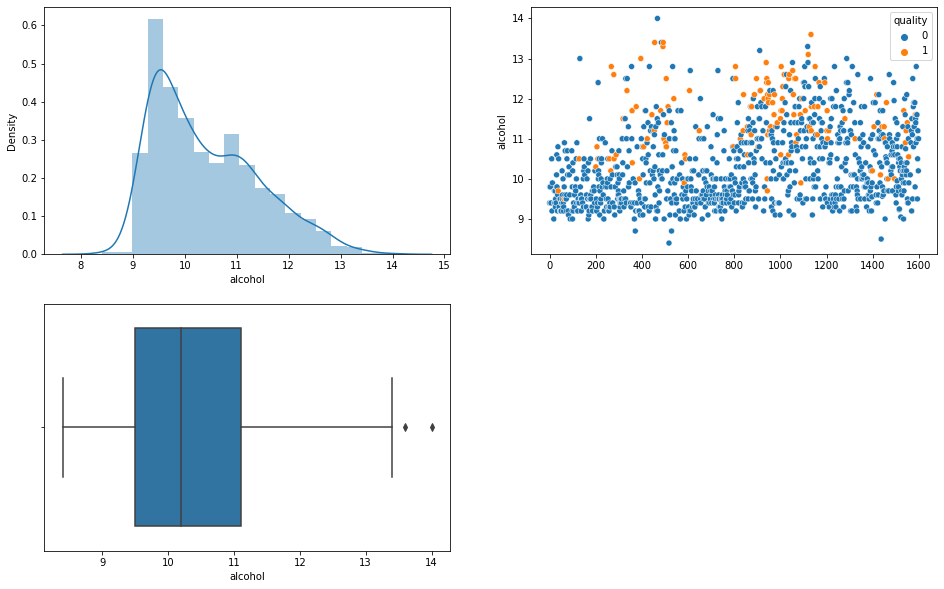

In [34]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["alcohol"])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["alcohol"], hue="quality")
plt.subplot(2,2,3)
sns.boxplot(data['alcohol'])

In [35]:
for spec in data["quality"].unique():
    selected_spec = data[data["quality"] == spec]
    selected_column = selected_spec["alcohol"]

    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)

    iqr = q3 - q1

    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr

    max_idxs = data[(data["quality"] == spec) & (data["alcohol"] > maximum)].index
    min_idxs = data[(data["quality"] == spec) & (data["alcohol"] < minimum)].index

    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1085 non-null   float64
 1   volatile acidity      1085 non-null   float64
 2   citric acid           1085 non-null   float64
 3   residual sugar        1085 non-null   float64
 4   chlorides             1085 non-null   float64
 5   free sulfur dioxide   1085 non-null   float64
 6   total sulfur dioxide  1085 non-null   float64
 7   density               1085 non-null   float64
 8   pH                    1085 non-null   float64
 9   sulphates             1085 non-null   float64
 10  alcohol               1085 non-null   float64
 11  quality               1085 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 142.5 KB


<AxesSubplot:>

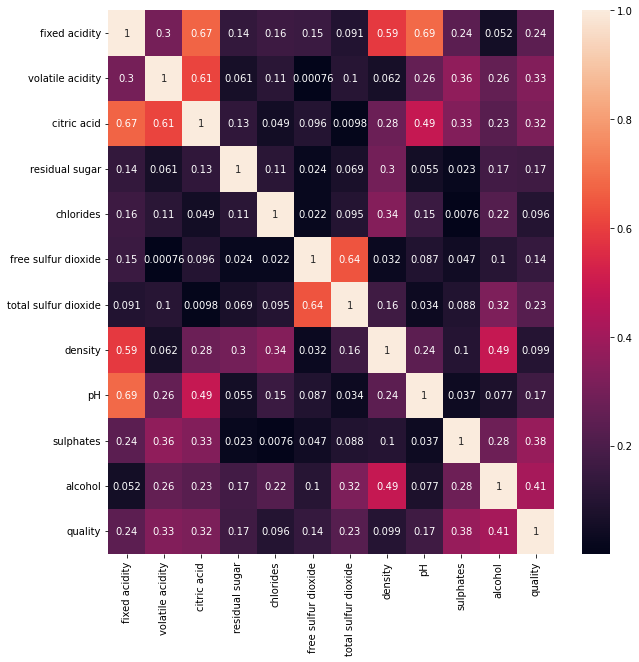

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [38]:
data.corr()["quality"].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.411488
sulphates               0.376774
volatile acidity        0.329860
citric acid             0.316585
fixed acidity           0.239601
total sulfur dioxide    0.226256
pH                      0.165865
residual sugar          0.165221
free sulfur dioxide     0.144439
density                 0.099290
chlorides               0.096087
Name: quality, dtype: float64

In [39]:
data["quality"].value_counts()

0    953
1    132
Name: quality, dtype: int64

In [40]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [46]:
Xtrain_o, ytrain_o = sm.fit_resample(Xtrain, ytrain)

In [47]:
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(Xtrain_o, ytrain_o, test_size=0.25, random_state=10)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(Xtrain1, ytrain1)

ypred = rfc.predict(Xtest1)

In [49]:
ypred1 = rfc.predict(Xtest)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
confusion_matrix(ytest1, ypred)

array([[164,  15],
       [  7, 173]], dtype=int64)

In [52]:
print(classification_report(ytest1, ypred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       179
           1       0.92      0.96      0.94       180

    accuracy                           0.94       359
   macro avg       0.94      0.94      0.94       359
weighted avg       0.94      0.94      0.94       359



In [53]:
confusion_matrix(ytest, ypred1)

array([[212,  24],
       [  9,  27]], dtype=int64)

In [54]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       236
           1       0.53      0.75      0.62        36

    accuracy                           0.88       272
   macro avg       0.74      0.82      0.77       272
weighted avg       0.90      0.88      0.89       272



In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(Xtrain1, ytrain1)

ypred2 = xgb.predict(Xtest1)

In [56]:
ypred22 = xgb.predict(Xtest)

In [57]:
confusion_matrix(ytest1, ypred2)

array([[164,  15],
       [  4, 176]], dtype=int64)

In [58]:
print(classification_report(ytest1, ypred2))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       179
           1       0.92      0.98      0.95       180

    accuracy                           0.95       359
   macro avg       0.95      0.95      0.95       359
weighted avg       0.95      0.95      0.95       359



In [59]:
confusion_matrix(ytest, ypred22)

array([[214,  22],
       [ 13,  23]], dtype=int64)

In [60]:
print(classification_report(ytest, ypred22))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       236
           1       0.51      0.64      0.57        36

    accuracy                           0.87       272
   macro avg       0.73      0.77      0.75       272
weighted avg       0.89      0.87      0.88       272

